# **Clasificacion de cluster para nuevos afiliados**



1. Preparación de Datos
2. División de los datos 70-30
3. Aprendizaje del Modelo: Tree, Knn, NN, SVM, RandomForest
4. Evaluación del Modelo: matriz de confusion, P,R, ROC
5. Guardar el modelo

* El despliegue se realiza en otro jupyter_notebook



In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [2]:
#Cargamos los datos
data = pd.read_csv("D:/Especializacion/Mineria de datos/Proyecto_Sura/Codigos/resultados_Kmeans_ExploraSura.csv", sep=";")
data.head()

,Conteo_Autorizaciones,Sexo,Edad,Nivel_Estudios,Regional,Regimen,Nivel_Ingresos,Estado_Civil,Ind_Masa_Corporal,Ind_Ejercicio,cluster
0,2,M,43,'SIN NIVEL EDUCATIVO','REGIONAL CENTRO',SUBSIDIADO,'NIVEL 2 DEL SISBEN','UNION LIBRE',SOBREPESO,ND,4
1,1,F,24,'SIN NIVEL EDUCATIVO','REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SIN INFORMACION DESDE LA FUENTE','PESO NORMAL O SALUDABLE',ND,1
2,1,M,77,'SIN NIVEL EDUCATIVO','REGIONAL EJE CAFETERO',CONTRIBUTIVO,'COTIZANTES CON INGRESOS ENTRE 2 Y 5 SMLMV','SIN INFORMACION DESDE LA FUENTE','PESO NORMAL O SALUDABLE',ND,8
3,1,F,56,TECNICA,'REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SIN INFORMACION DESDE LA FUENTE',OBESIDAD,ND,7
4,1,M,40,'SIN NIVEL EDUCATIVO','REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SOLTERO (A)',SOBREPESO,ND,4


In [3]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402968 entries, 0 to 402967
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Conteo_Autorizaciones  402968 non-null  int64 
 1   Sexo                   402968 non-null  object
 2   Edad                   402968 non-null  int64 
 3   Nivel_Estudios         402968 non-null  object
 4   Regional               402968 non-null  object
 5   Regimen                402968 non-null  object
 6   Nivel_Ingresos         402968 non-null  object
 7   Estado_Civil           402968 non-null  object
 8   Ind_Masa_Corporal      402968 non-null  object
 9   Ind_Ejercicio          402968 non-null  object
 10  cluster                402968 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 33.8+ MB


In [4]:
data=data.drop(columns=['Conteo_Autorizaciones'])

In [5]:
#Corrección de variables categóricas
data['Sexo']=data['Sexo'].astype('category')
data['Nivel_Estudios']=data['Nivel_Estudios'].astype('category')
data['Regional']=data['Regional'].astype('category')
data['Regimen']=data['Regimen'].astype('category')
data['Nivel_Ingresos']=data['Nivel_Ingresos'].astype('category')
data['Estado_Civil']=data['Estado_Civil'].astype('category')
data['Ind_Masa_Corporal']=data['Ind_Masa_Corporal'].astype('category')
data['Ind_Ejercicio']=data['Ind_Ejercicio'].astype('category')
data['cluster']=data['cluster'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402968 entries, 0 to 402967
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Sexo               402968 non-null  category
 1   Edad               402968 non-null  int64   
 2   Nivel_Estudios     402968 non-null  category
 3   Regional           402968 non-null  category
 4   Regimen            402968 non-null  category
 5   Nivel_Ingresos     402968 non-null  category
 6   Estado_Civil       402968 non-null  category
 7   Ind_Masa_Corporal  402968 non-null  category
 8   Ind_Ejercicio      402968 non-null  category
 9   cluster            402968 non-null  object  
dtypes: category(8), int64(1), object(1)
memory usage: 9.2+ MB


In [6]:
#descripcion de variables niméricas
data.describe()


,Edad
count,402968.000000
mean,48.439601
std,23.140362
min,0.000000
25%,31.000000
50%,51.000000
75%,66.000000
max,111.000000


<Axes: >

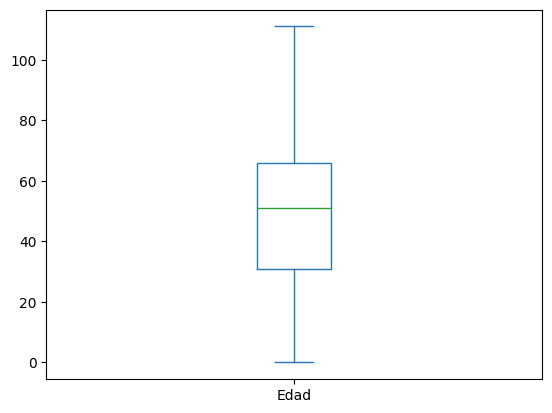

In [7]:
#Decripcion de variabloes numericas
data.plot(kind='box')

<Axes: xlabel='Sexo'>

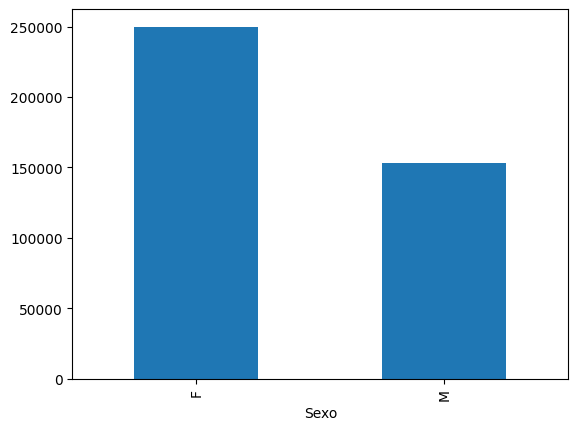

In [8]:
#Descripción variables categóricas
data['Sexo'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

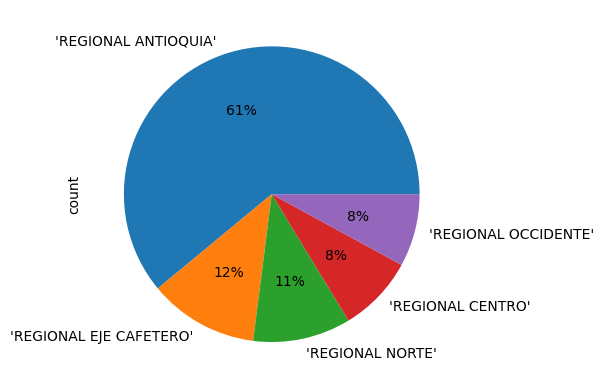

In [9]:
data['Regional'].value_counts().plot(kind='pie', autopct='%.0f%%')

In [10]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
data = pd.get_dummies(data, columns=['Sexo','Regimen'], drop_first=True, dtype=int)

data = pd.get_dummies(data, columns=['Nivel_Estudios','Regional','Nivel_Ingresos',
                                     'Estado_Civil','Ind_Masa_Corporal',
                                     'Ind_Ejercicio'], drop_first=False,  dtype=int) #No borra dummy

data.head()

,Edad,cluster,Sexo_M,Regimen_SUBSIDIADO,Nivel_Estudios_'SIN NIVEL EDUCATIVO',Nivel_Estudios_DOCTORADO/POSTDOCTORADO,Nivel_Estudios_ESPECIALIZACION,Nivel_Estudios_MAESTRIA,Nivel_Estudios_OTRO,Nivel_Estudios_PRIMARIA,...,Estado_Civil_'SOLTERO (A)',Estado_Civil_'UNION LIBRE',Estado_Civil_'VIUDO (A)',Ind_Masa_Corporal_'BAJO PESO',Ind_Masa_Corporal_'PESO NORMAL O SALUDABLE',Ind_Masa_Corporal_OBESIDAD,Ind_Masa_Corporal_SOBREPESO,Ind_Ejercicio_N,Ind_Ejercicio_ND,Ind_Ejercicio_S
0,43,4,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,24,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,77,8,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,56,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,40,4,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [11]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["cluster"]=labelencoder.fit_transform(data["cluster"]) #Objetivo

data.head()

,Edad,cluster,Sexo_M,Regimen_SUBSIDIADO,Nivel_Estudios_'SIN NIVEL EDUCATIVO',Nivel_Estudios_DOCTORADO/POSTDOCTORADO,Nivel_Estudios_ESPECIALIZACION,Nivel_Estudios_MAESTRIA,Nivel_Estudios_OTRO,Nivel_Estudios_PRIMARIA,...,Estado_Civil_'SOLTERO (A)',Estado_Civil_'UNION LIBRE',Estado_Civil_'VIUDO (A)',Ind_Masa_Corporal_'BAJO PESO',Ind_Masa_Corporal_'PESO NORMAL O SALUDABLE',Ind_Masa_Corporal_OBESIDAD,Ind_Masa_Corporal_SOBREPESO,Ind_Ejercicio_N,Ind_Ejercicio_ND,Ind_Ejercicio_S
0,43,4,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,24,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,77,8,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,56,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,40,4,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


# **2. Division 70-30**

<Axes: xlabel='cluster'>

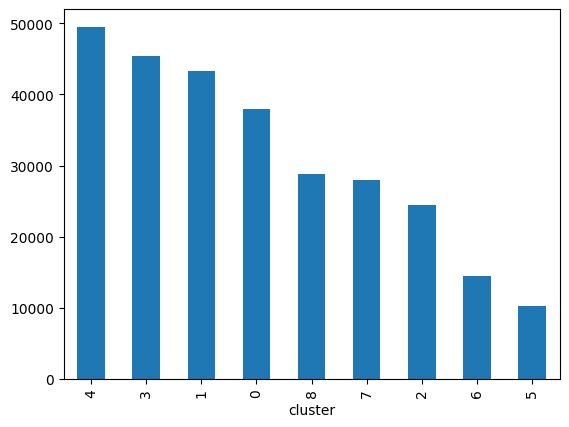

In [12]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("cluster", axis = 1) # Variables predictoras
Y = data['cluster'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado, siempre que este en clasificacion el muestreo debe ser estratificado
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='cluster'>

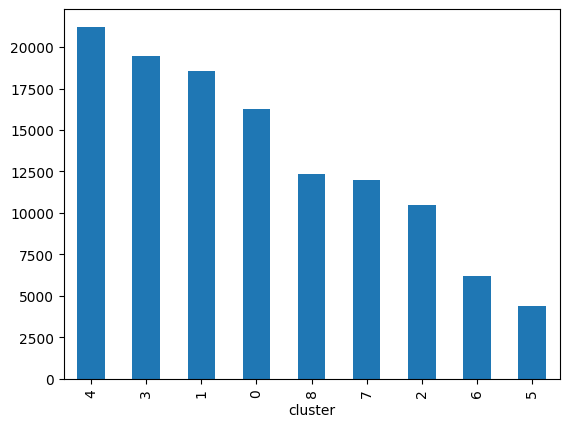

In [13]:
#Variable objetivo del 30%
Y_test.value_counts().plot(kind='bar')

# **3. Aprendizaje con el 70% y Evaluacion con el 30%**

# **Tree**

Transformacion:discretizar, el algoritmo lo puedo hacer, no se normaliza

In [14]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None) #gini, entropy
modelTree.fit(X_train, Y_train) #70% train

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


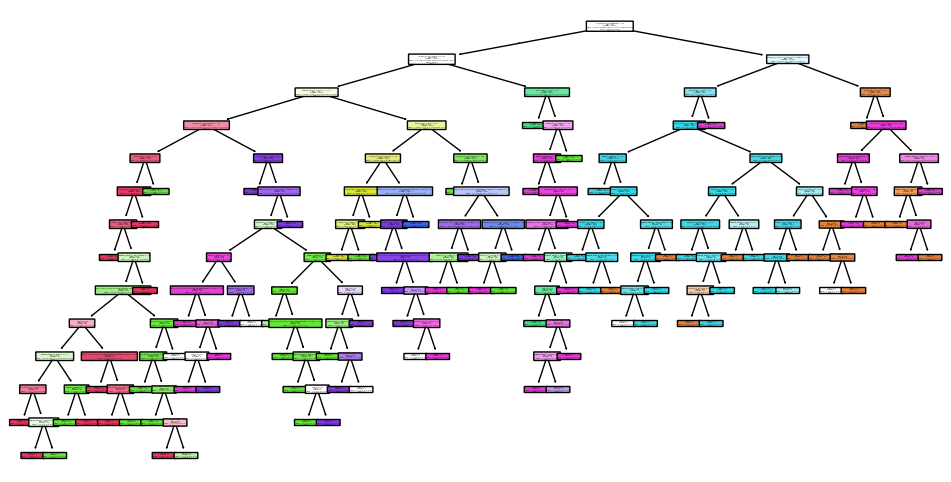

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

In [16]:
#Evaluación 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
print(Y_pred)

[7 0 5 ... 7 0 4]


In [17]:
#Exactitud
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.9999007370275703


In [18]:
#Matriz de confusion
from sklearn import metrics

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm

array([[16271,     0,     0,     0,     1,     0,     0,     0,     0],
       [    0, 18579,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0, 10505,     0,     0,     0,     0,     0,     1],
       [    0,     0,     0, 19446,     0,     0,     0,     0,     0],
       [    2,     0,     0,     0, 21214,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,  4362,     0,     0,     0],
       [    0,     0,     1,     0,     0,     0,  6173,     0,     0],
       [    0,     0,     0,     0,     0,     0,     4, 12002,     0],
       [    0,     0,     3,     0,     0,     0,     0,     0, 12327]])

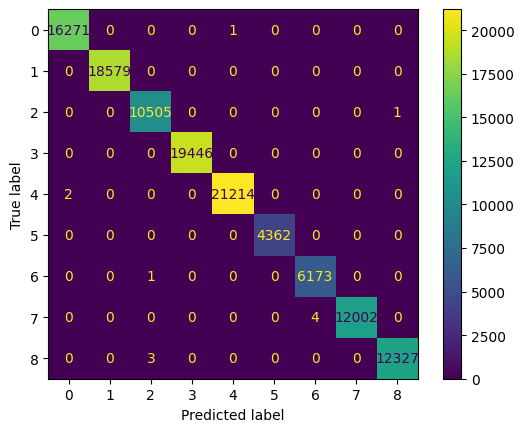

In [19]:
#Plot de la matriz de confusion
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

In [20]:
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16272
           1       1.00      1.00      1.00     18579
           2       1.00      1.00      1.00     10506
           3       1.00      1.00      1.00     19446
           4       1.00      1.00      1.00     21216
           5       1.00      1.00      1.00      4362
           6       1.00      1.00      1.00      6174
           7       1.00      1.00      1.00     12006
           8       1.00      1.00      1.00     12330

    accuracy                           1.00    120891
   macro avg       1.00      1.00      1.00    120891
weighted avg       1.00      1.00      1.00    120891



In [21]:
#metrics.RocCurveDisplay.from_estimator(modelTree,X_test, Y_test)

# **KNN**



*   Normalización




In [22]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Edad']]) #Ajuste de los parametros: max - min

#Se aplica la normalización a 70%  y 30%
X_train[['Edad']]= min_max_scaler.transform(X_train[['Edad']]) #70%
X_test[['Edad']]= min_max_scaler.transform(X_test[['Edad']]) #30%
X_train.head()

,Edad,Sexo_M,Regimen_SUBSIDIADO,Nivel_Estudios_'SIN NIVEL EDUCATIVO',Nivel_Estudios_DOCTORADO/POSTDOCTORADO,Nivel_Estudios_ESPECIALIZACION,Nivel_Estudios_MAESTRIA,Nivel_Estudios_OTRO,Nivel_Estudios_PRIMARIA,Nivel_Estudios_PROFESIONAL,...,Estado_Civil_'SOLTERO (A)',Estado_Civil_'UNION LIBRE',Estado_Civil_'VIUDO (A)',Ind_Masa_Corporal_'BAJO PESO',Ind_Masa_Corporal_'PESO NORMAL O SALUDABLE',Ind_Masa_Corporal_OBESIDAD,Ind_Masa_Corporal_SOBREPESO,Ind_Ejercicio_N,Ind_Ejercicio_ND,Ind_Ejercicio_S
159738,0.018018,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
355329,0.351351,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
327711,0.243243,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
58963,0.333333,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
102382,0.558559,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [23]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier #KNeighborsRegressor

modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train, Y_train) #70%

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16272
           1       1.00      1.00      1.00     18579
           2       1.00      1.00      1.00     10506
           3       1.00      1.00      1.00     19446
           4       1.00      1.00      1.00     21216
           5       1.00      1.00      1.00      4362
           6       1.00      1.00      1.00      6174
           7       1.00      1.00      1.00     12006
           8       1.00      1.00      1.00     12330

    accuracy                           1.00    120891
   macro avg       1.00      1.00      1.00    120891
weighted avg       1.00      1.00      1.00    120891



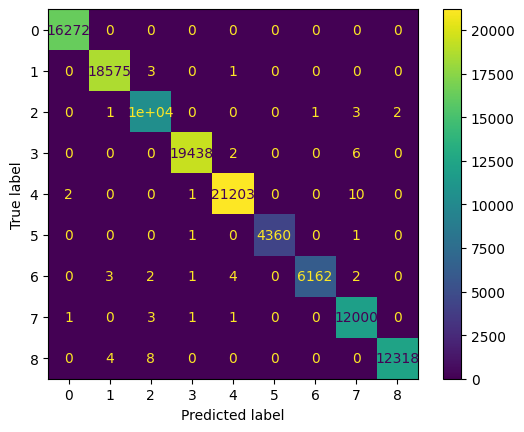

In [24]:
#Evaluación de Knn con 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(modelKnn,X_test, Y_test)

# **Red neuronal**



*   Normalizacion, imposible trabajar una red neuronal sin normalizacion



In [25]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=3)

modelNN.fit(X_train, Y_train) #70% normalizados

,hidden_layer_sizes,5
,activation,'logistic'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.2
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,3


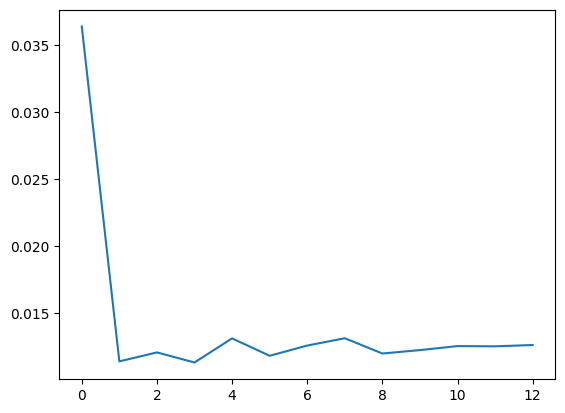

In [26]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16272
           1       1.00      1.00      1.00     18579
           2       0.99      0.99      0.99     10506
           3       1.00      1.00      1.00     19446
           4       1.00      1.00      1.00     21216
           5       1.00      1.00      1.00      4362
           6       1.00      1.00      1.00      6174
           7       0.99      0.99      0.99     12006
           8       1.00      1.00      1.00     12330

    accuracy                           1.00    120891
   macro avg       1.00      1.00      1.00    120891
weighted avg       1.00      1.00      1.00    120891



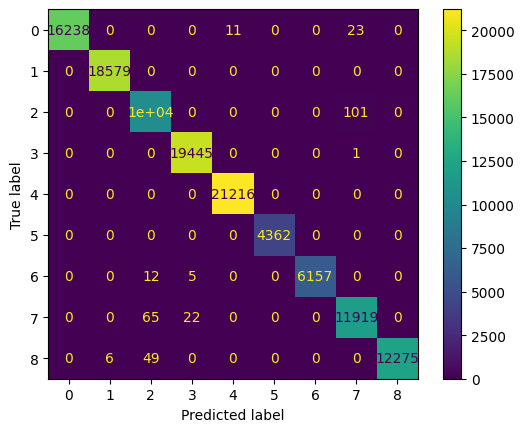

In [27]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

# **SVM (MAQUINA DE SOPORTE VECTORIAL)**



*   Ella va normalizada



In [28]:
#SVM
from sklearn.svm import SVC # SVR

modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16272
           1       1.00      1.00      1.00     18579
           2       0.99      0.99      0.99     10506
           3       1.00      1.00      1.00     19446
           4       1.00      1.00      1.00     21216
           5       1.00      1.00      1.00      4362
           6       1.00      1.00      1.00      6174
           7       0.99      0.99      0.99     12006
           8       1.00      1.00      1.00     12330

    accuracy                           1.00    120891
   macro avg       1.00      1.00      1.00    120891
weighted avg       1.00      1.00      1.00    120891



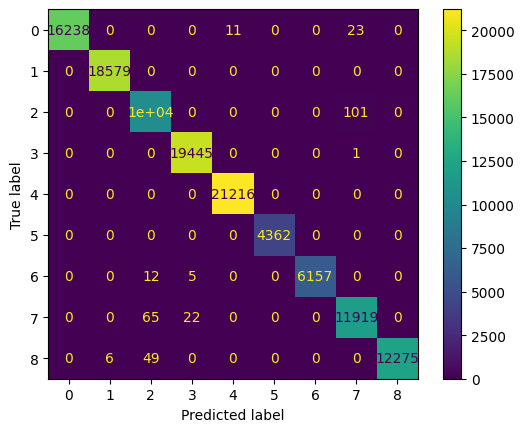

In [29]:
#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(modelSVM,X_test, Y_test)

# **5. Guardamos el modelo**

In [30]:
import pickle #es una libreria especifica para guardar modelos de SKLEARN
filename = 'modelo_class_red_neuronal.pkl'
variables= X.columns._values
pickle.dump([modelNN, labelencoder,variables,min_max_scaler], open(filename, 'wb'))